In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow
import tensorflow.compat.v1 as tf
from tensorflow.keras import utils as np_utils
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Convolution2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from torchvision import datasets
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import random
import math
from keras.preprocessing import image

In [ ]:
#Extracting files
#input file address
id1 = input("Please enter the address where the MNIST file is stored. If you have not downloaded the file, please enter any folder name, and MNIST will be downloaded automatically:")
id2 = input("Please enter the name of the folder where the pictures are stored, the folder is stored in the same level directory of this file by default:")

# Determine whether the input file address exists, if not, it will be created
if not os.path.exists(id1):
    os.makedirs(id1)

#Take out the total data of the training set and the test set. The data taken out here is expressed in the form of [tuple in the list], that is, the combination of pictures and labels
traindata = [i for i in datasets.MNIST(root="{}/".format(id1),train=True,download=True)]
testdata = [i for i in datasets.MNIST(root="{}/".format(id1),train=False,download=True)]

# Loop through pictures of numbers 0 to 9
for x in range(10):

	# The pictures in the tuple are taken out according to the number of cycles and stored in the list (here i is the picture, j is the label)
    data1,data2 = [ i for i,j in testdata if j == x ],[ i for i,j in traindata if j == x ]  
    # define storage path
    path1,path2 = "{0}/test_image_{1}".format(id2,x),"{0}/train_image_{1}".format(id2,x)  

    print("Saving [test set] and [training set] digital [{0}] pictures, each with {3}; {4}, stored in {1}; {2}"
            .format(x,path1,path2,len(data1),len(data2)))  # Here are stored separately: label number, path, number of elements
    if not os.path.exists(path1):  # Determine if a folder needs to be created, skip it if it exists
        os.makedirs(path1)
    if not os.path.exists(path2):
        os.makedirs(path2)
    for i, j in enumerate(data1):  # Store test set pictures: Iterate out all the pictures taken out and store them in the folder according to the corresponding index
        data1[i].save(path1+"\{}.png".format(i))
    for i, j in enumerate(data2):  # Save training set images
        data2[i].save(path2+"\{}.png".format(i))

print("After saving, a total of {} pictures are stored, thank you for using!".format(len(traindata)+len(testdata)))

In [2]:
model = Sequential()
model.add(Convolution2D(32, (5,5), activation='relu', input_shape=[28, 28, 1]))
model.add(Convolution2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
             optimizer=Adam(lr=0.0001),
             metrics=['accuracy'])

In [3]:
def load_data():
    #Training data is stored in data

    imgs=os.listdir('C:/Users/kingm/Desktop/save/train_data/')
    num=len(imgs)
    data=np.empty((num,1,28,28),dtype="float32")
    label=np.empty((num,),dtype="uint8")
    for i in range(num):
        img = Image.open('C:/Users/kingm/Desktop/save/train_data/'+imgs[i])
        arr = np.asarray (img, dtype="float32" )
        data[i,:,:,:] = arr
        label[i] = int(imgs[i].split('.')[0]) #Get the label of this image
    
    #The validation set data is stored in test.data
    imgs_test=os.listdir('C:/Users/kingm/Desktop/save/test_data/')
    num_test=len(imgs_test)
    test_data=np.empty((num_test, 1, 28, 28), dtype='float32' )
    test_label=np.empty((num_test,),dtype='uint8' )
    for i in range(num_test):
        img = Image.open('C:/Users/kingm/Desktop/save/test_data/'+imgs_test[i])
        arr = np.asarray(img, dtype='float32' )
        test_data[i,:,:,:] = arr
        test_label[i] = int(imgs_test[i]. split('.')[0])
        
    return data,label,test_data,test_label
                                                

In [4]:
#Download Data
data,label,test_data,test_label=load_data()
print(data.shape[0],'samples')


label=np_utils.to_categorical(label,10)
test_label=np_utils.to_categorical(test_label,10)

if K.image_data_format() == 'channel_first':
    data=data.reshape(data.shape[0],1,28,28)
    test_data=test_data.reshape(test_data.shape[0],1,28,28)
    input_shape=(1,28,28)
else:
    data=data.reshape(data.shape[0],28,28,1)
    test_data=test_data.reshape(test_data.shape[0],28,28,1)
    input_shape=(28,28,1)
K.set_image_data_format('channels_first')

12188 samples


In [5]:
history=model.fit(data,label,batch_size=100,epochs=10,shuffle=True,verbose=1,validation_data=(test_data,test_label))


#Evaluation model
score=model.evaluate(test_data,test_label,verbose=1)
print('score',score)
print('Test Socre:',score[0])
print('Test Accuracy:',score[1])
model.save('mnist-mpl.h5')
K.clear_session()

Epoch 1/10
122/122 [==============================] - 11s 89ms/step - loss: 3.1702 - accuracy: 0.9276 - val_loss: 0.0679 - val_accuracy: 0.9955
Epoch 2/10
122/122 [==============================] - 11s 88ms/step - loss: 0.1926 - accuracy: 0.9865 - val_loss: 0.0389 - val_accuracy: 0.9965
Epoch 3/10
122/122 [==============================] - 11s 91ms/step - loss: 0.1186 - accuracy: 0.9902 - val_loss: 0.0316 - val_accuracy: 0.9970
Epoch 4/10
122/122 [==============================] - 11s 93ms/step - loss: 0.0758 - accuracy: 0.9929 - val_loss: 0.0371 - val_accuracy: 0.9980
Epoch 5/10
122/122 [==============================] - 11s 92ms/step - loss: 0.0549 - accuracy: 0.9944 - val_loss: 0.0320 - val_accuracy: 0.9980
Epoch 6/10
122/122 [==============================] - 11s 91ms/step - loss: 0.0463 - accuracy: 0.9948 - val_loss: 0.0240 - val_accuracy: 0.9985
Epoch 7/10
122/122 [==============================] - 11s 89ms/step - loss: 0.0367 - accuracy: 0.9962 - val_loss: 0.0285 - val_accuracy:

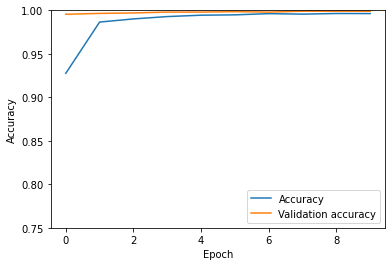

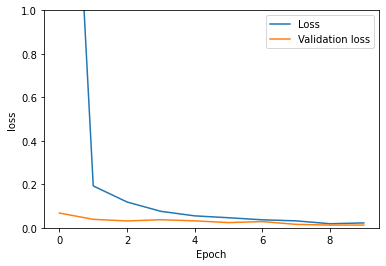

In [6]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model,to_file='modelunet.dot',show_shapes=True)

warning, language ps not recognized, use one of:
 dot canon plain plain-ext



ValueError: Cannot embed the 'dot' image format